# Multiple Linear Regression

**Bike Sharing Case study**

**Problem Statement**:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially, the company wants —

* Which variables are significant in predicting the demand for shared bikes.
* How well those variables describe the bike demands.

**So interpretation is important!**

The solution is divided into the following sections:

* Data understanding and exploration
* Data Visualisation
* Data preparation
* Splitting the Data into Training and Testing Sets
* Model building and evaluation

# Step 1: Data Understanding and exploration 
Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
#Reading the dataset
BS_day= pd.read_csv('day.csv')

In [4]:
# Check the head of the dataset
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the BS_day dataframe

In [5]:
BS_day.shape

(730, 16)

In [6]:
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
BS_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Understanding the Data Dictionary and parts of Data Preparation

The data dictionary contains the meaning of various attributes. some of which are explored and manipulated here.

In [9]:
#season
BS_day.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [10]:
# Assigning string values to different seasons instead of numeric values. These numeric values may misindicate some order to it.

BS_day.loc[(BS_day['season']==1), 'season']= 'spring'

BS_day.loc[(BS_day['season']==2), 'season']= 'summer'

BS_day.loc[(BS_day['season']==3), 'season']= 'fall'

BS_day.loc[(BS_day['season']==4), 'season']= 'winter'

In [11]:
BS_day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [12]:
# year (0: 2018, 1:2019)
BS_day['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

In [13]:
# Assigning string values to different months instead of numeric values. These numeric values may misindicate some order to it.

def month_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

# Apply map function on mnth column
BS_day[['mnth']]= BS_day[['mnth']].apply(month_map)


In [14]:
BS_day['mnth'].value_counts()

Jan      62
March    62
May      62
July     62
Aug      62
Oct      62
Dec      62
April    60
June     60
Sep      60
Nov      60
Feb      56
Name: mnth, dtype: int64

In [15]:
# whether day is a holiday or not (0: No, 1: Yes)
BS_day['holiday'].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [16]:
# Assigning string values to weekdays instead of numeric values. These values may misindicate some order to it.
def str_map(x):
    return x.map({1:'Wed', 2:'Thurs', 3:'Fri', 4:'Sat', 5:'Sun', 6:'Mon', 0:'Tues'})

# Apply this function to weekday column
BS_day[['weekday']]= BS_day[['weekday']].apply(str_map)

In [17]:
BS_day['weekday'].value_counts()

Wed      105
Thurs    105
Fri      104
Sat      104
Sun      104
Mon      104
Tues     104
Name: weekday, dtype: int64

In [18]:
# if a day is neither weekend nor a holiday it takes the value 1, otherwise 0
BS_day['workingday'].value_counts()

1    504
0    226
Name: workingday, dtype: int64

In [19]:
# Assigning string values to different weathesit instead of numeric values. These numeric values may misindicate some order to it.

#Clear, Few clouds, Partly cloudy, Partly cloudy
BS_day.loc[(BS_day['weathersit'] == 1), 'weathersit']= 'A'

#Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
BS_day.loc[(BS_day['weathersit'] == 2), 'weathersit']= 'B'

#Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
BS_day.loc[(BS_day['weathersit'] == 3), 'weathersit']= 'C'

#Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
BS_day.loc[(BS_day['weathersit'] == 4), 'weathersit']= 'D'

In [20]:
BS_day['weathersit'].value_counts()

A    463
B    246
C     21
Name: weathersit, dtype: int64

# Step 2: Visualising the Data
Let's now spend some time doing what is arguably the most important step - understanding the data.

* If there is some obvious multicollinearity going on, this is the first place to catch it
* Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

In [21]:
BS_day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

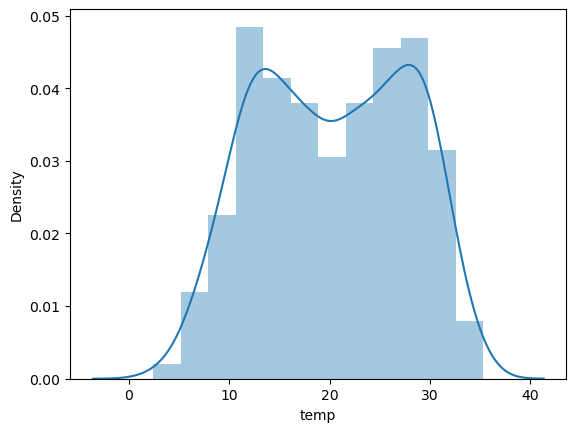

In [22]:
# temperature
sns.distplot(BS_day['temp'])
plt.show()

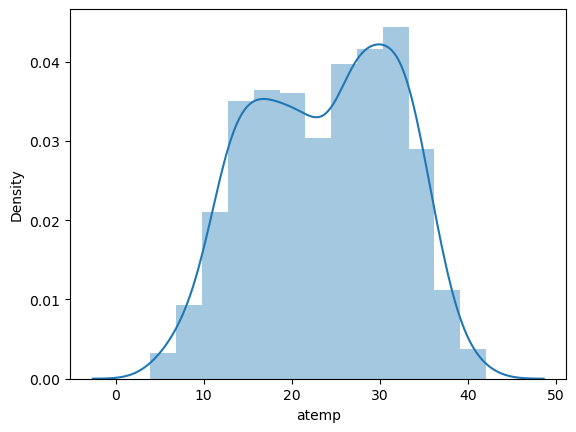

In [23]:
# Feeling temperature
sns.distplot(BS_day['atemp'])
plt.show()

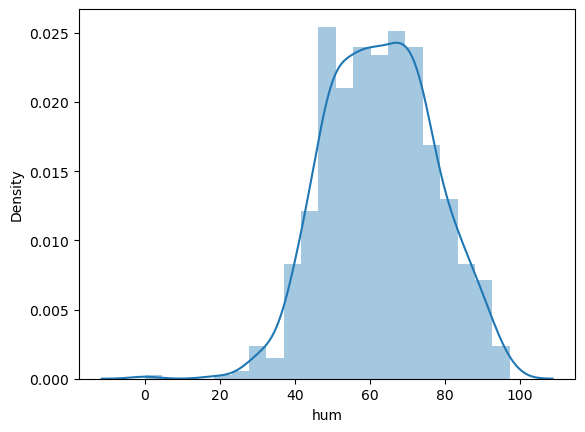

In [24]:
#Humidity

sns.distplot(BS_day['hum'])
plt.show()

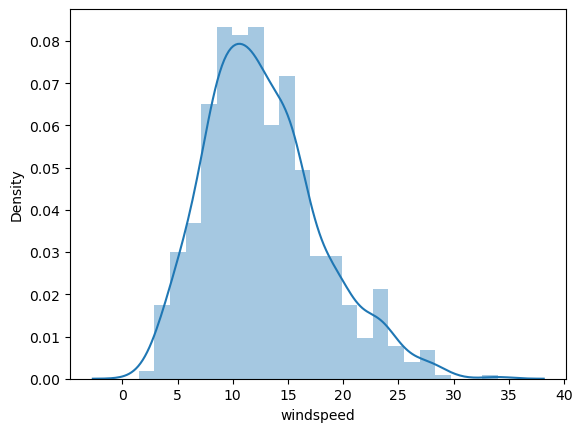

In [25]:
#Windspeed
sns.distplot(BS_day['windspeed'])
plt.show()

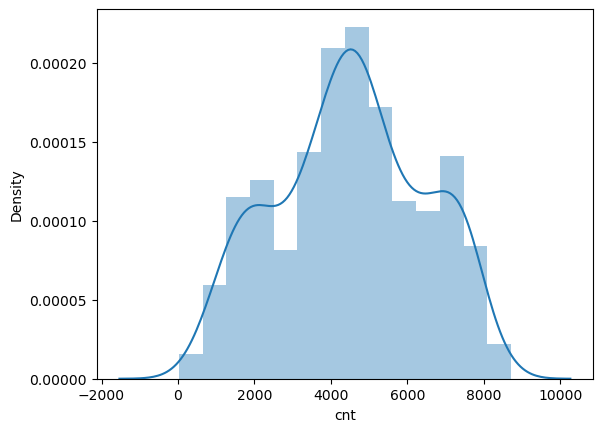

In [26]:
#Count of total rental bike including both casual and registered
sns.distplot(BS_day['cnt'])
plt.show()

In [27]:
# Converting date to datetime format
BS_day['dteday']= BS_day['dteday'].astype('datetime64')
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

In [28]:
#All categorical variables in the dataset
BS_day_categorical= BS_day.select_dtypes(exclude= ['float64','int64','datetime64'])
BS_day_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Wed,B
1,spring,Jan,Thurs,B
2,spring,Jan,Fri,A
3,spring,Jan,Sat,A
4,spring,Jan,Sun,A
...,...,...,...,...
725,spring,Dec,Sun,B
726,spring,Dec,Mon,B
727,spring,Dec,Tues,B
728,spring,Dec,Wed,A


### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

<Axes: xlabel='yr', ylabel='cnt'>

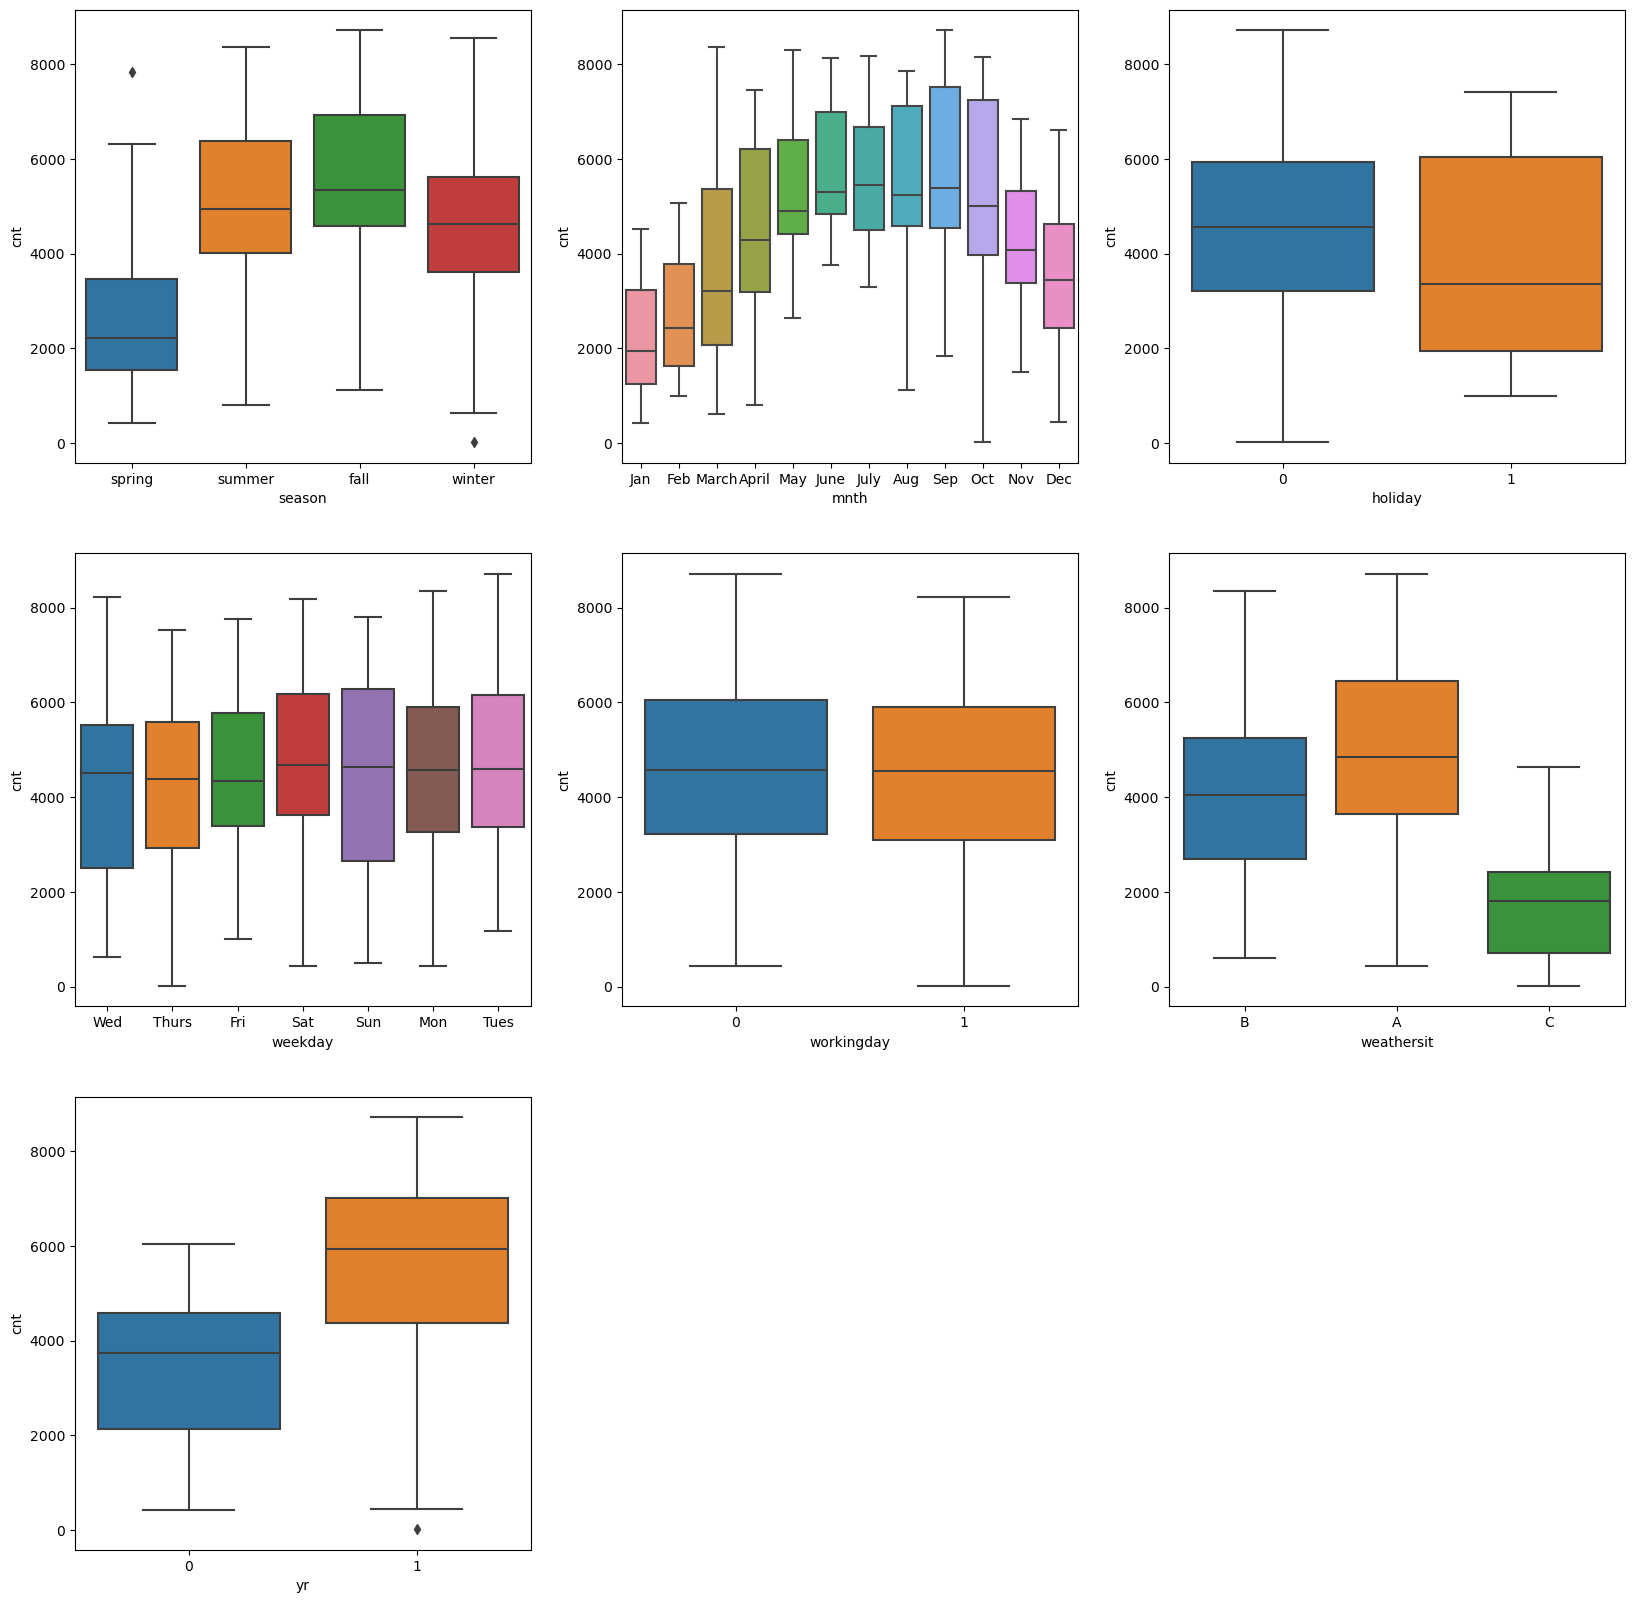

In [29]:
plt.figure(figsize= (20,20))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = BS_day)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = BS_day)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = BS_day)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = BS_day)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = BS_day)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = BS_day)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = BS_day)


### Visualising Numerical Variables

Let's make a pairplot of all the numeric variables

In [30]:
# converting 'Casual', 'registered' and 'cnt' variable from numeric to float.
# This step is performed to seperate out categorical variables like 'yr','holiday','workingday' which have binary values in them.

intvariablelist = ['casual', 'registered', 'cnt']
for var in intvariablelist:
    BS_day[var] = BS_day[var].astype('float')

In [31]:
BS_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    float64       
 14  registered  730 non-null    float64       
 15  cnt         730 non-null    float64       
dtypes: datetime64[ns](1), floa

In [32]:
# All numeric variables in the dataset
BS_day_numeric = BS_day.select_dtypes(include = ['float64'] )
BS_day_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


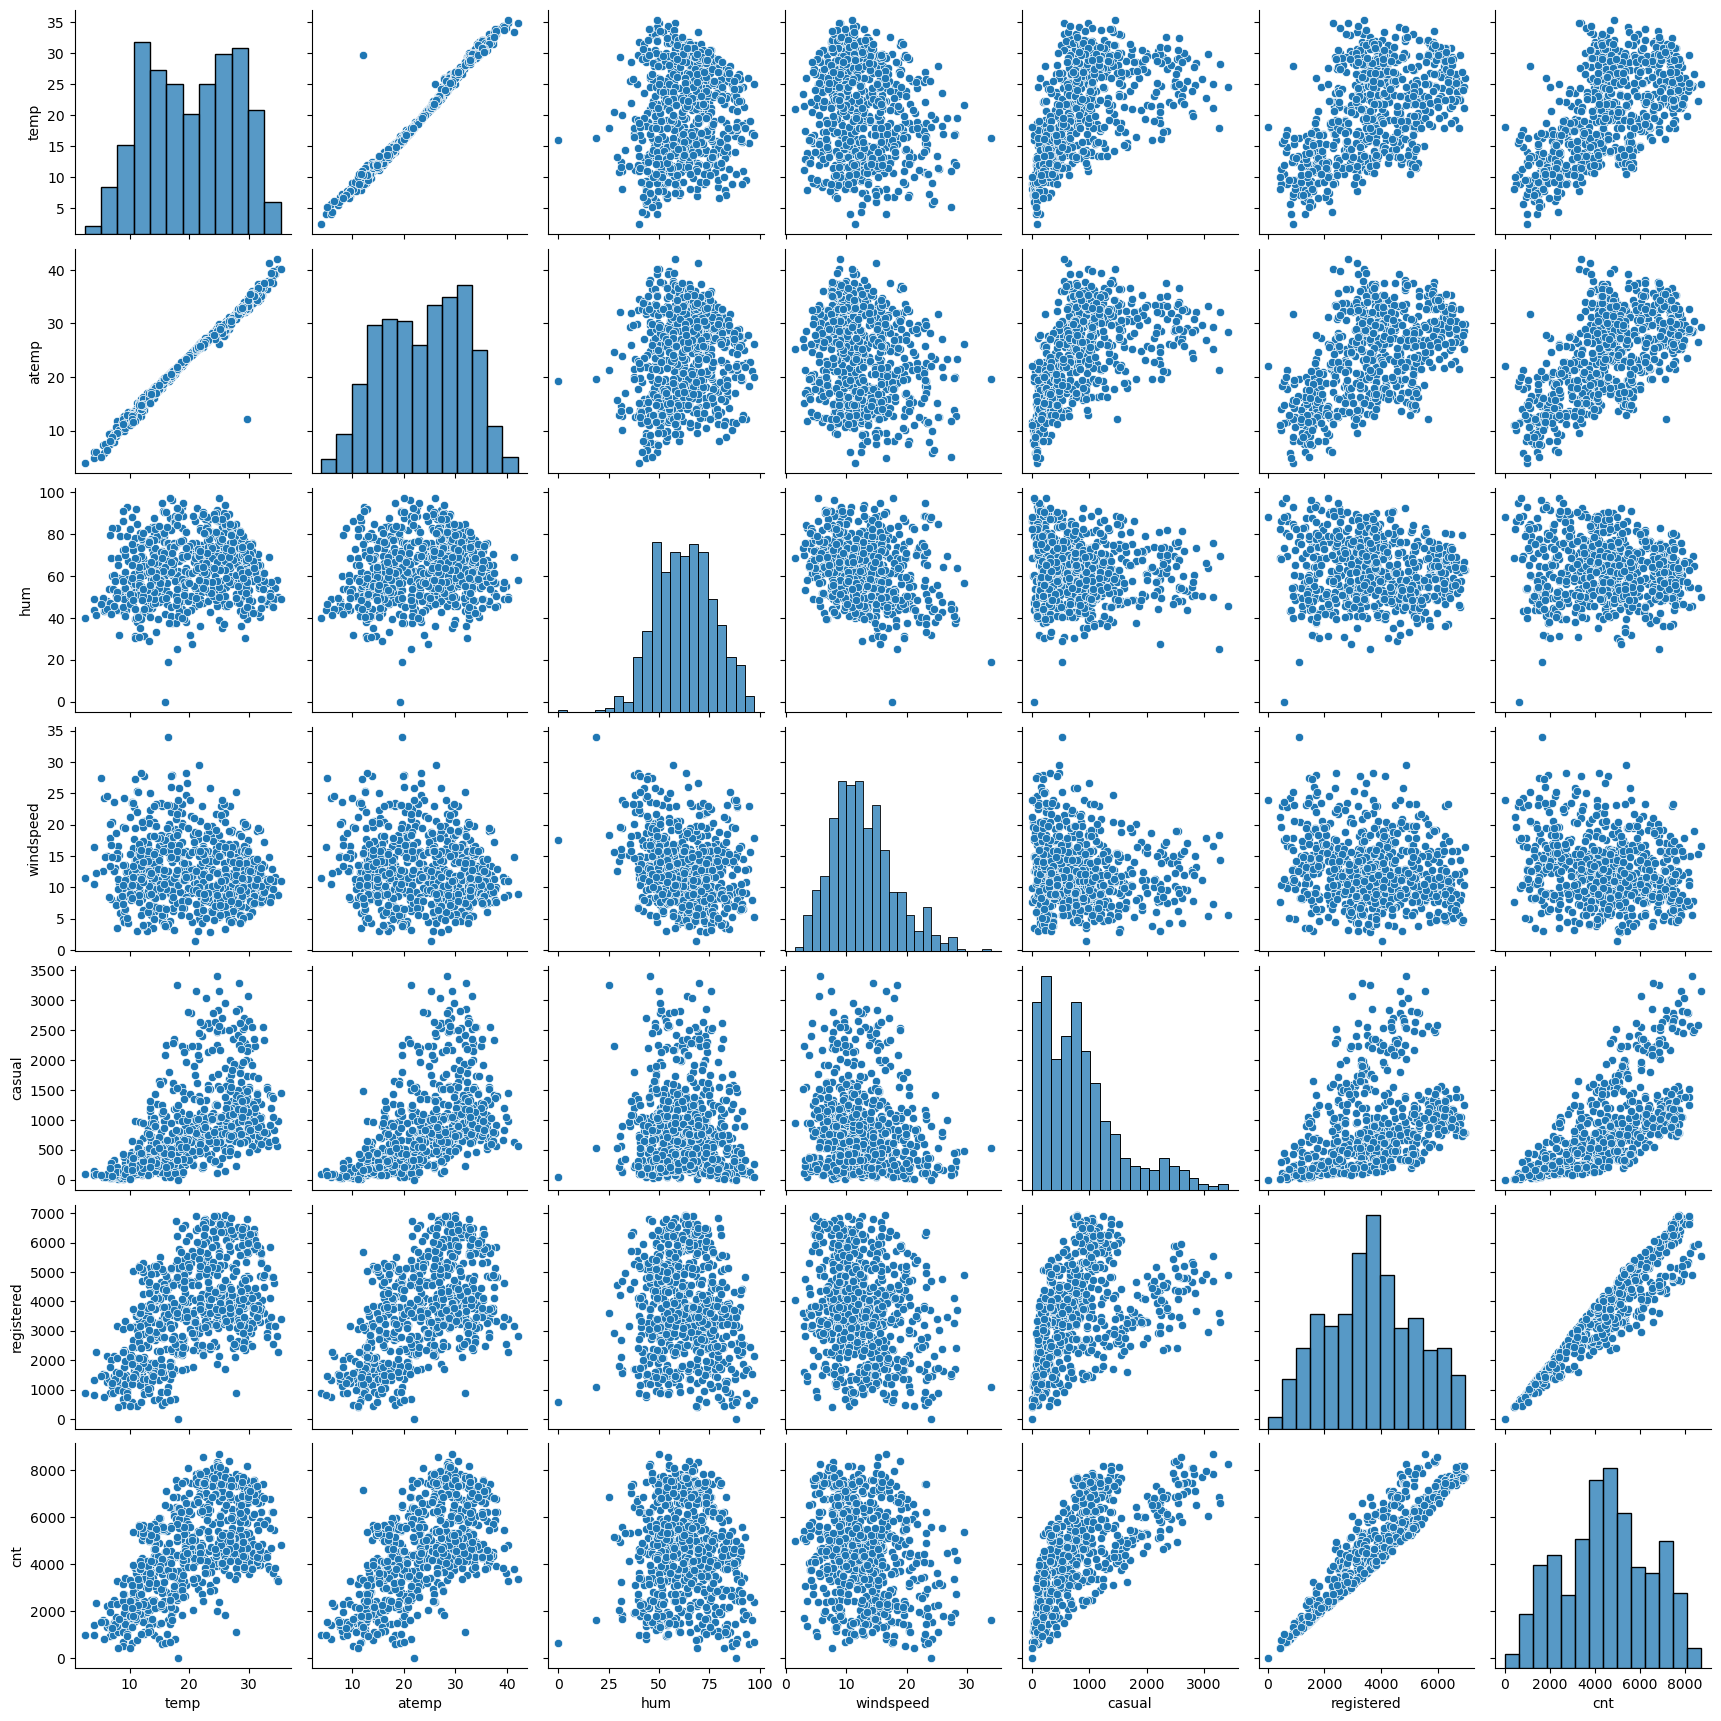

In [33]:
#Pairwise scatter plot
sns.pairplot(BS_day_numeric)
plt.show()

We can better plot correlation matrix between variables to know the exact values of correlation between them. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

In [34]:
#Correlation matrix

cor= BS_day_numeric.corr()
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


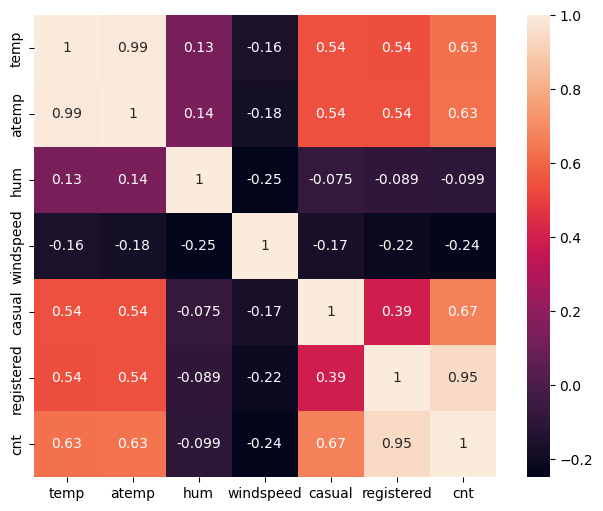

In [35]:
#Let's plot heatmap for correlation

plt.figure(figsize= (8,6))
sns.heatmap(cor, annot= True, square=True)
plt.show()

Correlation of count('cnt') with independent variables:-

* 'Cnt' is highly positively correlated with 'casual' and 'registered' and further it is high with 'atemp'.We can clearly understand the high positive correlation of 'cnt' with 'casual' and 'registered' as both of them together add up to represent 'cnt.' 
* 'Cnt' is negatively correlated with 'windspeed'. This indicates that demand of shared bikes is less in windy days as compared to normal days.

Correlation among independent variables:-

* Some of the independent variables are highly correlated with each other like 'temp' and 'atemp' are highly positively correlated which leads to the chance of having multicollinearity. Thus, while building the model, we will have to pay attention to it. 

In [36]:
#Removing 'atemp' as it is highly correlated with 'temp'

BS_day.drop('atemp', axis=1, inplace= True )

In [37]:
BS_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Wed,1,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-02-01,spring,0,Jan,0,Thurs,1,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-03-01,spring,0,Jan,0,Fri,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-04-01,spring,0,Jan,0,Sat,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-05-01,spring,0,Jan,0,Sun,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## Step 3: Data Preparation

Let's now prepare the data and build the model. Note that we had not included 'yr', 'mnth', 'holiday', 'weekday' and 'workingday' as object variables in the initial data exploration steps so as to avoid too many dummy variables creation. They have binary values: 0s and 1s in them which have specific meanings associated with them.

In [38]:
# Subset all categorical variables
BS_day_categorical = BS_day.select_dtypes(include=['object'])

### Dummy Variables
The variable 'season','mnth','weekday' and 'weathersit' have different levels. We need to convert these levels into integers.

For this, we will use something called dummy variables.

In [39]:
# Convert into dummies

BS_day_dummies = pd.get_dummies(BS_day_categorical, drop_first= True)
BS_day_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_July,mnth_June,mnth_March,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
list(BS_day_categorical.columns)

['season', 'mnth', 'weekday', 'weathersit']

In [41]:
# Drop categorical variable columns
BS_day = BS_day.drop(list(BS_day_categorical.columns), axis=1)

In [42]:
# Concatenate dummy variables with the original dataframe
BS_day = pd.concat([BS_day, BS_day_dummies], axis=1)

In [43]:
BS_day.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,0,0,0,0,1,1,0
1,2,2018-02-01,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,0,1,0,0,1,0
2,3,2018-03-01,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,0,0,0,0,0,0,0,0
3,4,2018-04-01,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,1,0,0,0,0,0,0
4,5,2018-05-01,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,1,0,0,0,0,0


In [44]:
# Drop the 'instant' and 'dteday' column as they of not any use to us for the analysis
BS_day = BS_day.drop(['instant', 'dteday'], axis=1, inplace=False)
BS_day.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,1,0,0,0,0,0


In [45]:
# Dropping 'casual' and 'registered' as together they add up to cnt which can create multicollinearity
BS_day.drop(['casual', 'registered'], axis=1, inplace= True)
BS_day.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
0,0,0,1,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,1,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [46]:
# Splitting the dataframe into train and test sets
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(BS_day, train_size = 0.7, test_size = 0.3, random_state = 100)

In [47]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,7534.0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,7216.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,4066.0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,10.489153,48.3333,23.500518,1796.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220.0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,6664.0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,7261.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,1917.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,10.591653,56.0833,16.292189,2739.0,0,0,1,...,0,0,0,0,0,0,0,1,1,0


### Rescaling the Features

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.
So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:
* Min-Max scaling
* Standardisation (mean-0, sigma-1)

This time, we will use MinMax scaling.


In [48]:
from sklearn.preprocessing import MinMaxScaler 

In [49]:
scaler = MinMaxScaler()

In [50]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']
df_train[var]= scaler.fit_transform(df_train[var])

In [51]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.605840,0.355596,0.764151,0,1,0,...,0,0,0,0,0,1,0,0,1,0
578,1,0,1,0.863973,0.679690,0.187140,0.832835,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,0.218017,1,0,0,...,0,0,0,0,1,0,0,0,0,0
350,0,0,1,0.248216,0.577930,0.431816,0.312586,0,0,1,...,0,0,0,0,0,0,0,1,1,0


In [52]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,...,0.086275,0.080392,0.129412,0.143137,0.147059,0.152941,0.137255,0.154902,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,...,0.281045,0.272166,0.335985,0.350557,0.354512,0.360284,0.344454,0.362166,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


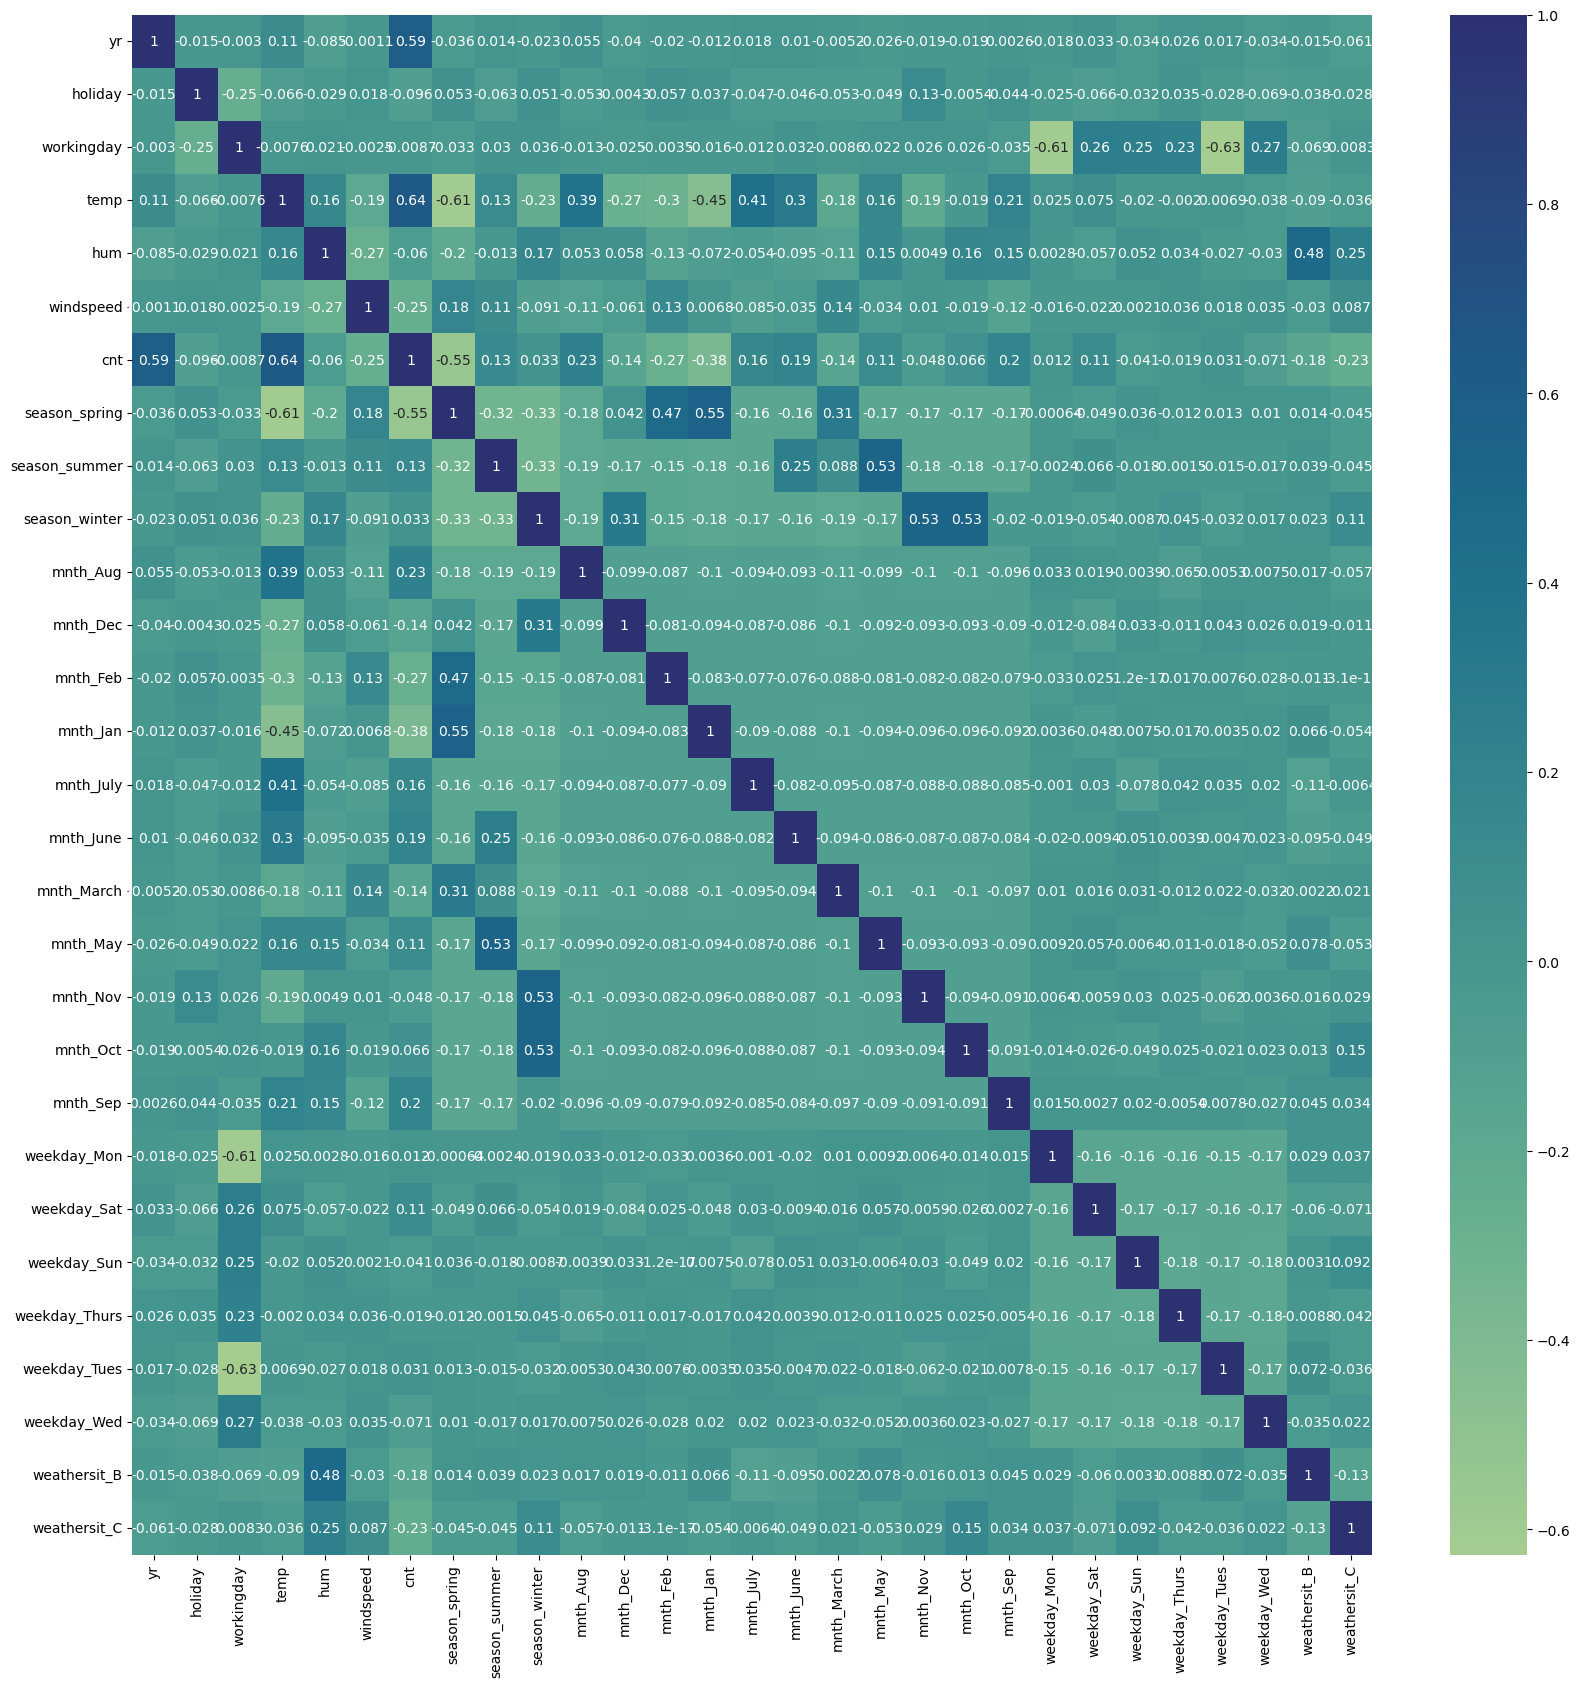

In [53]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize= (20,20))
sns.heatmap(df_train.corr(), annot= True, cmap='crest')
plt.show()

As we can see here, temp seems to the correlated to cnt the most. Let's see a pairplot for temp vs cnt.

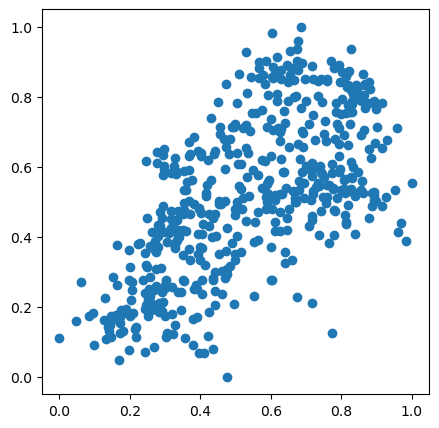

In [54]:
plt.figure(figsize=[5,5])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [55]:
X_train= df_train
y_train= df_train.pop('cnt')

In [56]:
X_train.shape

(510, 28)

In [57]:
y_train.shape

(510,)

In [58]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [59]:
# This is done to convert all the features into array before fitting the model and avoid any error popping up
np.asarray(df_train)

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

### Building the first model with all the features

Let's build the first model with all the features.

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.


In [60]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression()

In [61]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const            0.383302
yr               0.230857
holiday         -0.135424
workingday      -0.060524
temp             0.445458
hum             -0.157315
windspeed       -0.183046
season_spring   -0.043705
season_summer    0.042243
season_winter    0.110897
mnth_Aug         0.021507
mnth_Dec        -0.045669
mnth_Feb        -0.037279
mnth_Jan        -0.063612
mnth_July       -0.034910
mnth_June        0.000975
mnth_March       0.000608
mnth_May         0.024064
mnth_Nov        -0.041555
mnth_Oct         0.005790
mnth_Sep         0.086055
weekday_Mon     -0.045078
weekday_Sat      0.015104
weekday_Sun      0.011241
weekday_Thurs   -0.015058
weekday_Tues    -0.038721
weekday_Wed     -0.013392
weathersit_B    -0.059355
weathersit_C    -0.251511
dtype: float64

In [62]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23085682 -0.13542389 -0.06052424  0.44545797 -0.15731473 -0.18304612
 -0.04370474  0.04224289  0.11089693  0.02150709 -0.04566922 -0.03727876
 -0.06361179 -0.03490968  0.00097451  0.00060798  0.02406416 -0.04155465
  0.00578994  0.08605503 -0.04507831  0.01510409  0.01124081 -0.01505841
 -0.0387206  -0.01339217 -0.05935514 -0.25151085]
0.383302043307501


In [63]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     98.04
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          4.33e-179
Time:                        15:24:41   Log-Likelihood:                 523.81
No. Observations:                 510   AIC:                            -989.6
Df Residuals:                     481   BIC:                            -866.8
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3833      0.084      4.558      0.000       0.218       0.549
yr                0.2309      0.008     28.387      0.000       0.215       0.247
holiday          -0.1354      0.065     -2.072      0.039      -0.264      -0.007
workingday       -0.0605      0.071     -0.852      0.395      -0.200       0.079
temp              0.4455      0.047      9.513      0.000       0.353       0.537
hum              -0.1573      0.039     -4.049      0.000      -0.234      -0.081
windspeed        -0.1830      0.026     -7.036      0.000      -0.234      -0.132
season_spring    -0.0437      0.030     -1.444      0.149      -0.103       0.016
season_summer     0.0422      0.026      1.598      0.111      -0.010       0.094
season_winter     0.1109      0.028      3.938      0.000       0.056       0.166
mnth_Aug          0.0215      0.034      0.632      0.527      -0.045       0.088
mnth_Dec         -0.0457      0.034     -1.348      0.178      -0.112       0.021
mnth_Feb         -0.0373      0.033     -1.121      0.263      -0.103       0.028
mnth_Jan         -0.0636      0.034     -1.880      0.061      -0.130       0.003
mnth_July        -0.0349      0.035     -0.985      0.325      -0.105       0.035
mnth_June         0.0010      0.025      0.038      0.969      -0.049       0.051
mnth_March        0.0006      0.025      0.025      0.980      -0.048       0.049
mnth_May          0.0241      0.021      1.134      0.257      -0.018       0.066
mnth_Nov         -0.0416      0.037     -1.133      0.258      -0.114       0.031
mnth_Oct          0.0058      0.036      0.160      0.873      -0.065       0.077
mnth_Sep          0.0861      0.032      2.667      0.008       0.023       0.149
weekday_Mon      -0.0451      0.071     -0.637      0.524      -0.184       0.094
weekday_Sat       0.0151      0.015      0.980      0.327      -0.015       0.045
weekday_Sun       0.0112      0.015      0.736      0.462      -0.019       0.041
weekday_Thurs    -0.0151      0.015     -1.005      0.315      -0.045       0.014
weekday_Tues     -0.0387      0.071     -0.548      0.584      -0.178       0.100
weekday_Wed      -0.0134      0.015     -0.886      0.376      -0.043       0.016
weathersit_B     -0.0594      0.011     -5.637      0.000      -0.080      -0.039
weathersit_C     -0.2515      0.027     -9.455      0.000      -0.304      -0.199
==============================================================================
Omnibus:                       78.889   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              209.035
Skew:                          -0.768   Prob(JB):                     4.06e-46
Kurtosis:                       5.735   Cond. No.                         70.0
================================================================

This model has adjusted R-squared value of **84.2%** which is pretty good. But let's see if we can reduce the number of features and exclude those which are not much relevant in explaining the target variable.

### Model Building using RFE

Now, you have close to 28 features. It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features (this is also because SKLearn doesn't have Adjusted R-squared that statsmodels has).

In [64]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe1 = RFE(lm, n_features_to_select=15)             
rfe1 = rfe1.fit(X_train, y_train)


In [65]:
list(zip(X_train.columns, rfe1.support_, rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', False, 9),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', False, 2),
 ('mnth_Jan', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 4),
 ('weekday_Sat', False, 10),
 ('weekday_Sun', False, 11),
 ('weekday_Thurs', False, 7),
 ('weekday_Tues', False, 5),
 ('weekday_Wed', False, 8),
 ('weathersit_B', True, 1),
 ('weathersit_C', True, 1)]

### Model Building and Evaluation
Let's now check the summary of this model using statsmodels.

In [66]:
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 15 selected columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,yr,holiday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Dec,mnth_Jan,mnth_July,mnth_Nov,mnth_Sep,weathersit_B,weathersit_C
653,1.0,1,0,0.509887,0.575354,0.300794,0,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,1,0,0,1,0,0,0,0,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,0,0,1,0


In [67]:
# Fitting the model with 15 variables
lm1= sm.OLS(y_train, X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          3.34e-189
Time:                        15:24:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3202      0.036      8.886

Note that the new model built on the selected features doesn't show much dip in the accuracy in comparison to the model which was built on all the features. It has gone from **84.2%** to **84.1%**. This is indeed a good indication to proceed with these selected features.

But let's check for the multicollinearity among these variables.

### Checking VIF
Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

**𝑉𝐼𝐹𝑖 = 1/1−𝑅𝑖2**
 ¶

In [68]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
a = X_train_rfe1.drop('const',axis=1)

In [70]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,30.94
2,temp,17.80
4,windspeed,4.72
5,season_spring,4.37
7,season_winter,4.06
6,season_summer,2.81
13,weathersit_B,2.32
0,yr,2.09
11,mnth_Nov,1.83
9,mnth_Jan,1.75


In [71]:
from sklearn.feature_selection import RFE

# Running RFE with the output number of the variable equal to 7
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe2 = RFE(lm, n_features_to_select=7)             
rfe2 = rfe2.fit(X_train, y_train)

In [72]:
list(zip(X_train.columns, rfe2.support_, rfe2.ranking_))

[('yr', True, 1),
 ('holiday', False, 2),
 ('workingday', False, 11),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', False, 3),
 ('mnth_Aug', False, 17),
 ('mnth_Dec', False, 9),
 ('mnth_Feb', False, 10),
 ('mnth_Jan', False, 7),
 ('mnth_July', True, 1),
 ('mnth_June', False, 21),
 ('mnth_March', False, 22),
 ('mnth_May', False, 14),
 ('mnth_Nov', False, 8),
 ('mnth_Oct', False, 20),
 ('mnth_Sep', False, 4),
 ('weekday_Mon', False, 12),
 ('weekday_Sat', False, 18),
 ('weekday_Sun', False, 19),
 ('weekday_Thurs', False, 15),
 ('weekday_Tues', False, 13),
 ('weekday_Wed', False, 16),
 ('weathersit_B', False, 5),
 ('weathersit_C', True, 1)]

In [73]:
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe2.support_]

# Subsetting training data for 15 selected columns
X_train_rfe2 = X_train[col1]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)
X_train_rfe2.head()

,const,yr,temp,hum,windspeed,season_spring,mnth_July,weathersit_C
653,1.0,1,0.509887,0.575354,0.300794,0,0,0
576,1.0,1,0.815169,0.725633,0.264686,0,1,0
426,1.0,1,0.442393,0.640189,0.255342,1,0,0
728,1.0,1,0.245101,0.498067,0.663106,1,0,0
482,1.0,1,0.395666,0.504508,0.188475,0,0,0


In [74]:
# Fitting the model with 7 variables
lm2= sm.OLS(y_train, X_train_rfe2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     312.2
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          2.34e-178
Time:                        15:24:56   Log-Likelihood:                 466.35
No. Observations:                 510   AIC:                            -916.7
Df Residuals:                     502   BIC:                            -882.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4277      0.030     14.348

In [75]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [76]:
b = X_train_rfe2.drop('const', axis=1)

In [77]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,hum,10.47
1,temp,10.37
3,windspeed,3.89
0,yr,2.03
4,season_spring,1.80
5,mnth_July,1.35
6,weathersit_C,1.11


From the model summary above, all the variables have p-value < 0.05 and from the p-value perspective, all variables seem significant. But notice that there are a few variables which have VIF > 5. We need to deal with these variables carefully.

So let's try removing 'hum' first having the maximum VIF and then check for it again. Dropping this variable may result in a change in other VIFs which are high.

In [78]:
# Let's drop the 'hum' column
X_train_rfe2.drop("hum",axis=1,inplace=True)
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_July,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [79]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Now that we have removed one variable, let's fit the model with 6 variables
lm3 = sm.OLS(y_train, X_train_rfe2).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     321.7
Date:                Sun, 31 Dec 2023   Prob (F-statistic):          1.37e-168
Time:                        15:25:03   Log-Likelihood:                 440.46
No. Observations:                 510   AIC:                            -866.9
Df Residuals:                     503   BIC:                            -837.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2596      0.020     12.986

In [80]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
c = X_train_rfe2.drop('const', axis=1)

In [82]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.95
2,windspeed,3.72
0,yr,2.03
3,season_spring,1.49
4,mnth_July,1.26
5,weathersit_C,1.04


All the VIF values and p-values seem to be in the permissible range now. Also the Adjusted R-squared value has dropped from **84.2%** with 28 variables to just **79.1%** using 6 variables. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [83]:
y_train_cnt = lm3.predict(X_train_rfe2)

Text(0.5, 0, 'Errors')

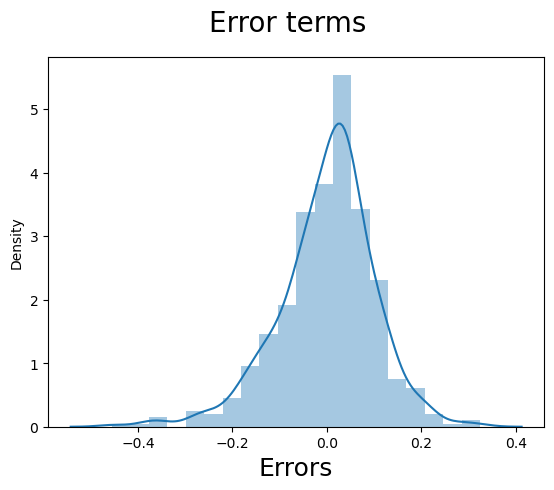

In [84]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)



The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

### Making Predictions Using the Final Model

In [85]:
X_train_rfe2

,const,yr,temp,windspeed,season_spring,mnth_July,weathersit_C
653,1.0,1,0.509887,0.300794,0,0,0
576,1.0,1,0.815169,0.264686,0,1,0
426,1.0,1,0.442393,0.255342,1,0,0
728,1.0,1,0.245101,0.663106,1,0,0
482,1.0,1,0.395666,0.188475,0,0,0
...,...,...,...,...,...,...,...
526,1.0,1,0.824514,0.355596,0,0,0
578,1.0,1,0.863973,0.187140,0,0,0
53,1.0,0,0.202618,0.111379,1,0,0
350,1.0,0,0.248216,0.431816,0,0,0


In [86]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,20.815737,61.961883,12.600130,4546.981735,0.255708,0.264840,0.232877,...,0.082192,0.086758,0.173516,0.141553,0.132420,0.123288,0.155251,0.118721,0.319635,0.027397
std,0.500722,0.188034,0.481313,7.689600,14.456669,4.984858,1898.633630,0.437258,0.442259,0.423633,...,0.275286,0.282125,0.379560,0.349389,0.339723,0.329520,0.362974,0.324202,0.467403,0.163612
min,0.000000,0.000000,0.000000,3.957390,25.416700,1.500244,441.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.093750,51.166700,9.021282,3303.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,20.807500,60.916700,12.167200,4579.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,27.401653,72.192050,15.395629,5869.500000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,34.815847,97.250000,27.999836,8395.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [87]:
#Scaling
var

['temp', 'hum', 'windspeed', 'cnt']

In [88]:
df_test[var] = scaler.transform(df_test[var]) 

In [89]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [90]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,1,0,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [91]:
# Let's check the list 'col2' which had the 6 variables RFE had selected
col2=c.columns
col2

Index(['yr', 'temp', 'windspeed', 'season_spring', 'mnth_July',
       'weathersit_C'],
      dtype='object')

In [92]:
X_test_rfe2 = X_test[col2]

In [93]:
# Add a constant to the test set created
X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   temp           219 non-null    float64
 3   windspeed      219 non-null    float64
 4   season_spring  219 non-null    uint8  
 5   mnth_July      219 non-null    uint8  
 6   weathersit_C   219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(3)
memory usage: 9.2 KB


In [94]:
# Making predictions
y_pred = lm3.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

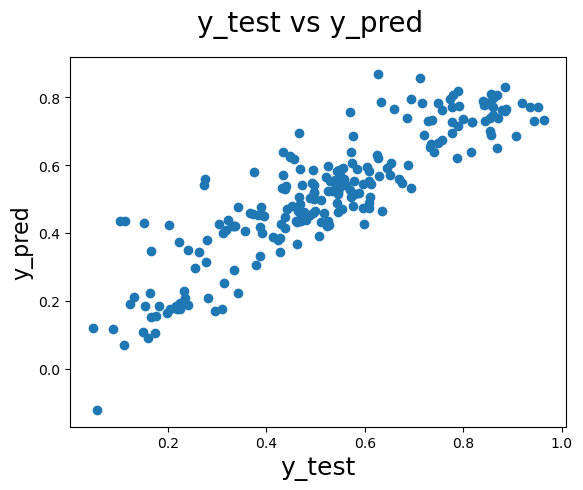

In [95]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [96]:
#r2_score for 6 variables
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7802124353228018

Thus, for the model with 6 variables, the r-squared on training and test data is about **79.3%** and **78.02%** respectively. The adjusted r-squared on the train set is about is about **79.1%**.

### Checking the correlations between the final predictor variables

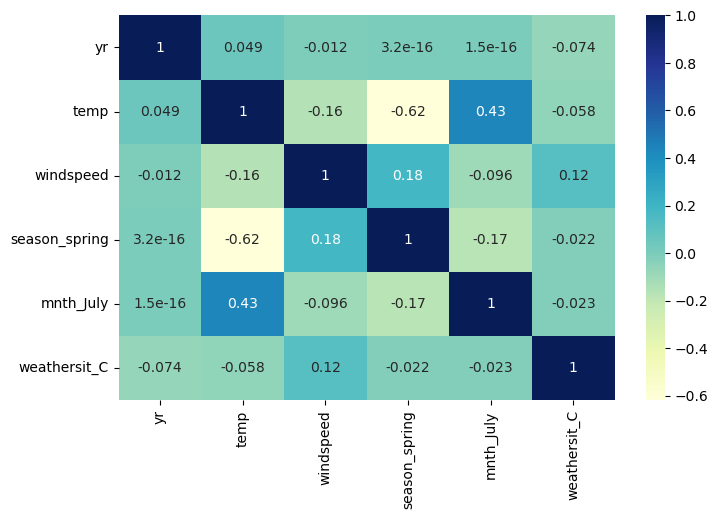

In [97]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(BS_day[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

This is the simplest model that we could build. The final predictors seem to have fairly low correlations.

Thus, the final model consists of the 6 variables mentioned above.One can go ahead with this model and use it for predicting count of daily bike rentals.
